<a href="https://colab.research.google.com/github/Shuvo3128/AI-Engineer-Level-1-Technical-Assessment/blob/main/Traffic_GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70340 entries, 0 to 70339
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Description              70340 non-null  object 
 1   Belts                    70340 non-null  object 
 2   Personal.Injury          70340 non-null  object 
 3   Property.Damage          70340 non-null  object 
 4   Commercial.License       70340 non-null  object 
 5   Commercial.Vehicle       70340 non-null  object 
 6   State                    70337 non-null  object 
 7   VehicleType              70340 non-null  object 
 8   Year                     69906 non-null  float64
 9   Make                     69892 non-null  object 
 10  Model                    69885 non-null  object 
 11  Color                    69452 non-null  object 
 12  Charge                   70340 non-null  object 
 13  Contributed.To.Accident  70340 non-null  object 
 14  Rac

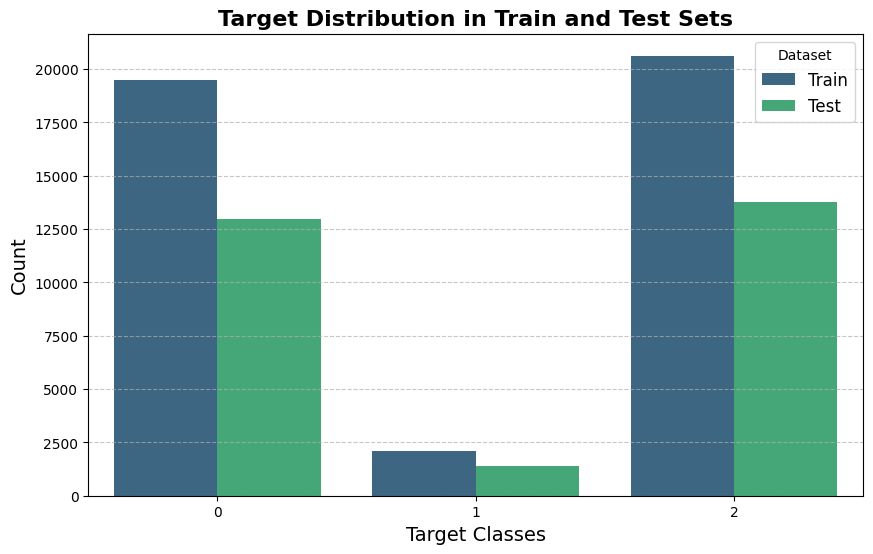

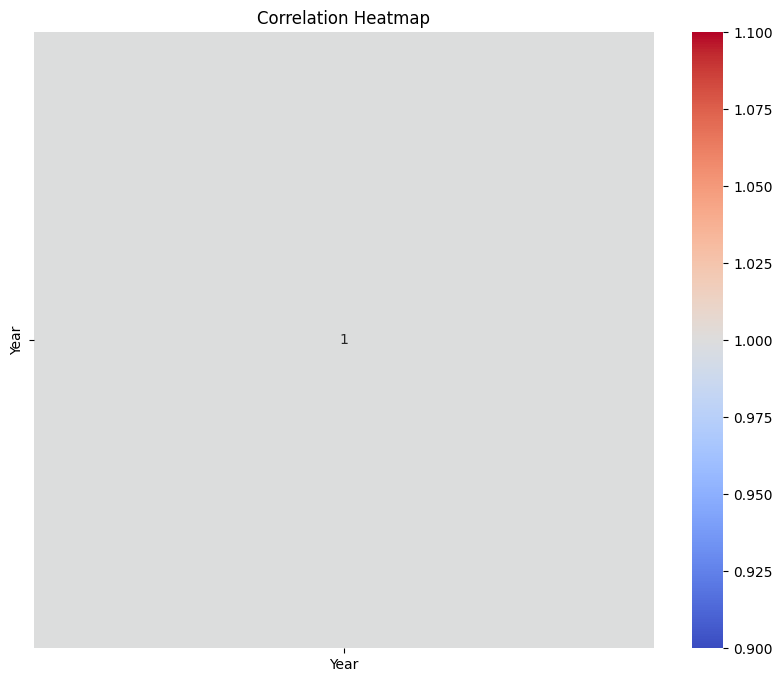

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/traffic_violations.csv')
print("Initial Data Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())
print("\nSample:\n", data.head())

# Separate features and target
target_col = 'Violation.Type'
X = data.drop(columns=target_col)
y = data[target_col]

# Separate column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Handle missing values + encode + scale in a pipeline
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded
)

# Fit-transform training data; transform testing data
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# --- Visualization of target distribution ---
train_data = pd.DataFrame({'Dataset': 'Train', 'Target': y_train})
test_data = pd.DataFrame({'Dataset': 'Test', 'Target': y_test})
combined_data = pd.concat([train_data, test_data])

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='Target', hue='Dataset', palette='viridis')
plt.title("Target Distribution in Train and Test Sets", fontsize=16, fontweight='bold')
plt.xlabel("Target Classes", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Dataset", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Correlation heatmap (original numeric only) ---
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
data.head()

,Description,Belts,Personal.Injury,Property.Damage,Commercial.License,Commercial.Vehicle,State,VehicleType,Year,Make,...,Color,Charge,Contributed.To.Accident,Race,Gender,Driver.City,Driver.State,DL.State,Arrest.Type,Violation.Type
0,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,No,No,No,No,No,NC,02 - Automobile,2013.0,HYUNDAI,...,GRAY,13411f,No,WHITE,F,ASHEVILLE,NC,NC,A - Marked Patrol,Citation
1,DRIVER FAIL TO STOP AT RED TRAFFIC SIGNAL BEFO...,No,No,No,No,No,MD,02 - Automobile,2015.0,FORD,...,SILVER,21202i1,No,OTHER,M,SILVER SPRING,MD,MD,A - Marked Patrol,Citation
2,DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE,No,No,No,No,No,MD,02 - Automobile,2000.0,TOYOTA,...,BLACK,21902a2,No,BLACK,M,SILVER SPRING,MD,MD,B - Unmarked Patrol,Citation
3,PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,No,No,No,No,No,MD,02 - Automobile,2012.0,HOND,...,BLACK,16303c,No,BLACK,M,COLUMBIA,MD,MD,A - Marked Patrol,Citation
4,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,No,No,No,Yes,No,MD,02 - Automobile,2010.0,FORD,...,BLACK,13411f,No,WHITE,M,MOUNT AIRY,MD,MD,A - Marked Patrol,Citation


In [ ]:
pip install torch torch-geometric scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [ ]:
import torch
from torch_geometric.data import Data
from sklearn.neighbors import kneighbors_graph

# --- Use the already preprocessed X_train (sparse matrix) ---
X_array = X_train.toarray() if not isinstance(X_train, np.ndarray) else X_train
X_tensor = torch.tensor(X_array, dtype=torch.float)

# --- Use k-NN to define graph edges (unsupervised similarity) ---
knn_graph = kneighbors_graph(X_array, n_neighbors=5, mode='connectivity', include_self=False)
edge_index = torch.tensor(knn_graph.nonzero(), dtype=torch.long).T  # shape [2, num_edges]

# --- Create graph data object ---
graph_data = Data(x=X_tensor, edge_index=edge_index, y=torch.tensor(y_train, dtype=torch.long))

print(graph_data)

Data(x=[42204, 7401], edge_index=[211020, 2], y=[42204])


In [ ]:
from sklearn.neighbors import kneighbors_graph
import scipy.sparse as sp
import numpy as np
import torch

# Convert preprocessed matrix (X_train) to array if it's sparse
X_array = X_train.toarray() if not isinstance(X_train, np.ndarray) else X_train

# 1. Create adjacency using k-NN (scikit-learn)
adj = kneighbors_graph(X_array, n_neighbors=5, include_self=False)
adj_coo = sp.coo_matrix(adj)

# 2. Get valid edge index from COO matrix
row = torch.tensor(adj_coo.row, dtype=torch.long)
col = torch.tensor(adj_coo.col, dtype=torch.long)
edge_index = torch.stack([row, col], dim=0)  # Shape [2, num_edges]

# 3. Create node features tensor
X_tensor = torch.tensor(X_array, dtype=torch.float)
y_tensor = torch.tensor(y_train, dtype=torch.long)

# 4. Build the graph data object
from torch_geometric.data import Data
graph_data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)


In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch.nn import Linear
from torch_geometric.loader import DataLoader

class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Define model
input_dim = X_tensor.shape[1]
hidden_dim = 64
output_dim = len(np.unique(y_train))
model = GCN(input_dim, hidden_dim, output_dim)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
loss_fn = torch.nn.NLLLoss()

# --- Training Loop ---
def train(model, data, epochs=100):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        out = model(data)
        loss = loss_fn(out, data.y)
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch {epoch} | Loss: {loss.item():.4f}")

train(model, graph_data)


Epoch 0 | Loss: 1.1349
Epoch 10 | Loss: 0.6893
Epoch 20 | Loss: 0.6279
Epoch 30 | Loss: 0.6063
Epoch 40 | Loss: 0.5896
Epoch 50 | Loss: 0.5744
Epoch 60 | Loss: 0.5573
Epoch 70 | Loss: 0.5457
Epoch 80 | Loss: 0.5341
Epoch 90 | Loss: 0.5299


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.neighbors import kneighbors_graph

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Assuming 'graph_data' object is available from previous cells
input_dim = graph_data.num_node_features
hidden_dim = 64
output_dim = len(np.unique(y_train)) # Use y_train which was used to create graph_data.y
model = GCN(input_dim, hidden_dim, output_dim)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.NLLLoss()

# ------------------- 6. Training --------------------
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    loss = criterion(out, graph_data.y)
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# ------------------- 7. Evaluation --------------------
model.eval()
_, pred = model(graph_data.x, graph_data.edge_index).max(dim=1)
correct = pred.eq(graph_data.y).sum().item()
acc = correct / graph_data.num_nodes
print(f"Training Accuracy (GNN): {acc:.4f}")

Epoch 0, Loss: 1.0870
Epoch 20, Loss: 0.6280
Epoch 40, Loss: 0.5855
Epoch 60, Loss: 0.5428
Epoch 80, Loss: 0.5198
Epoch 100, Loss: 0.5103
Epoch 120, Loss: 0.5074
Epoch 140, Loss: 0.5036
Epoch 160, Loss: 0.5027
Epoch 180, Loss: 0.4982
Training Accuracy (GNN): 0.7721


In [ ]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import scipy.sparse as sp
from torch_geometric.data import Data

# Standardize features without centering (suitable for sparse data)
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_train)

# Convert to dense if still sparse
if not isinstance(X_scaled, np.ndarray):
    X_scaled = X_scaled.toarray()

# Convert to tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float)
y_tensor = torch.tensor(y_train, dtype=torch.long)

# Create k-NN graph with more neighbors
adj = kneighbors_graph(X_scaled, n_neighbors=10, include_self=False)
adj_coo = sp.coo_matrix(adj)
row = torch.tensor(adj_coo.row, dtype=torch.long)
col = torch.tensor(adj_coo.col, dtype=torch.long)
edge_index = torch.stack([row, col], dim=0)



In [ ]:
from torch_geometric.utils import add_self_loops

edge_index, _ = add_self_loops(edge_index, num_nodes=X_tensor.size(0))


In [ ]:
graph_data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)


In [ ]:
from torch_geometric.nn import SAGEConv
import torch.nn.functional as F

class GraphSAGE(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(input_dim, hidden_dim)
        self.conv2 = SAGEConv(hidden_dim, hidden_dim)
        self.conv3 = SAGEConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.4, training=self.training)
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)


In [ ]:
input_dim = graph_data.num_node_features
hidden_dim = 128
output_dim = len(np.unique(y_train))

model = GraphSAGE(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = torch.nn.NLLLoss()


NameError: name 'graph_data' is not defined

In [ ]:
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    loss = criterion(out, graph_data.y)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


NameError: name 'model' is not defined

In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.neighbors import kneighbors_graph

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/traffic_violations.csv")

# Check actual column names
print(df.columns.tolist())

# Set the correct target column name
target_column = "Violation.Type"
y = df[target_column]
X = df.drop(columns=[target_column])

categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Label encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Preprocessing pipeline
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numerical_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

X_processed = preprocessor.fit_transform(X)

# ------------------- 3. Train-test split --------------------
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# ------------------- 4. Convert to Graph --------------------
X_tensor = torch.tensor(X_train.toarray() if hasattr(X_train, 'toarray') else X_train, dtype=torch.float)
y_tensor = torch.tensor(y_train, dtype=torch.long)

# Build kNN graph
k = 5
A = kneighbors_graph(X_tensor.numpy(), k, mode='connectivity', include_self=False)
edge_index = torch.tensor(A.nonzero(), dtype=torch.long).t().contiguous()

data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)

# ------------------- 5. GNN Model --------------------
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

input_dim = data.num_node_features
hidden_dim = 64
output_dim = len(np.unique(y_train))
model = GCN(input_dim, hidden_dim, output_dim)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.NLLLoss()

# ------------------- 6. Training --------------------
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# ------------------- 7. Evaluation --------------------
model.eval()
_, pred = model(data.x, data.edge_index).max(dim=1)
correct = pred.eq(data.y).sum().item()
acc = correct / data.num_nodes
print(f"Training Accuracy (GNN): {acc:.4f}")

['Description', 'Belts', 'Personal.Injury', 'Property.Damage', 'Commercial.License', 'Commercial.Vehicle', 'State', 'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Charge', 'Contributed.To.Accident', 'Race', 'Gender', 'Driver.City', 'Driver.State', 'DL.State', 'Arrest.Type', 'Violation.Type']



=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

    Citation       0.83      0.68      0.75     12981
        SERO       1.00      0.97      0.98      1402
     Warning       0.74      0.87      0.80     13753

    accuracy                           0.79     28136
   macro avg       0.86      0.84      0.84     28136
weighted avg       0.80      0.79      0.79     28136



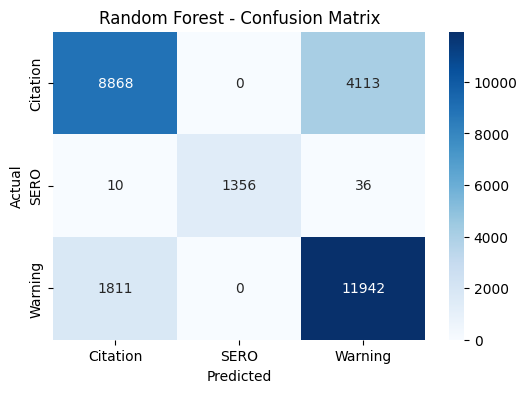

ROC AUC Score: 0.9087

=== XGBoost ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:08:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

    Citation       0.89      0.64      0.74     12981
        SERO       1.00      0.97      0.99      1402
     Warning       0.73      0.92      0.81     13753

    accuracy                           0.79     28136
   macro avg       0.87      0.84      0.85     28136
weighted avg       0.82      0.79      0.79     28136



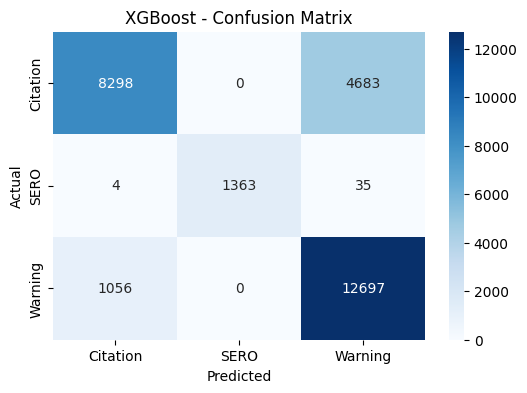

ROC AUC Score: 0.9183

=== Logistic Regression ===
Classification Report:
              precision    recall  f1-score   support

    Citation       0.83      0.70      0.76     12981
        SERO       1.00      0.98      0.99      1402
     Warning       0.75      0.87      0.81     13753

    accuracy                           0.79     28136
   macro avg       0.86      0.85      0.85     28136
weighted avg       0.80      0.79      0.79     28136



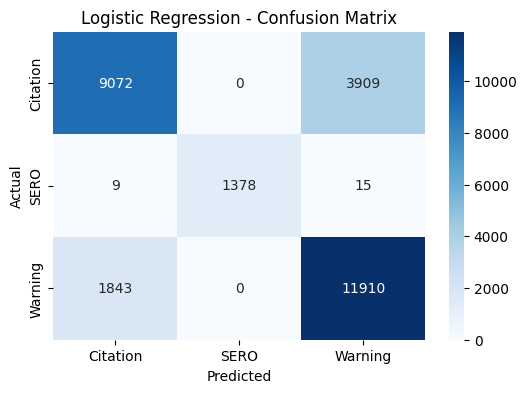

ROC AUC Score: 0.9178


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC-AUC (only for binary or will average if multiclass)
    try:
        y_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr')
        print(f"ROC AUC Score: {auc_score:.4f}")
    except:
        print("ROC AUC not available for this model.")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


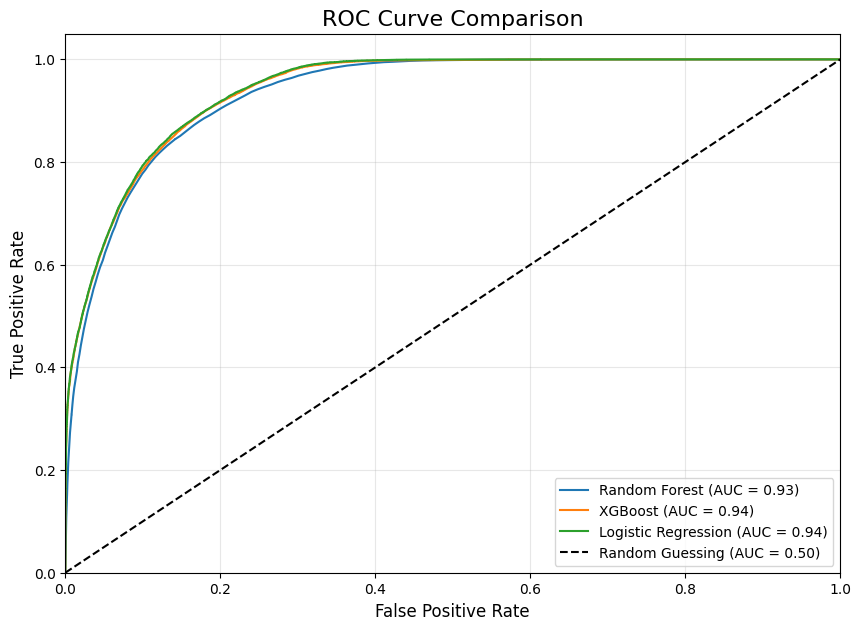

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

# Binarize the output (for multiclass ROC)
n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_train_bin = label_binarize(y_train, classes=np.arange(n_classes))

# Initialize models
roc_models = {
   "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Plot ROC curves
plt.figure(figsize=(10, 7))

for name, clf in roc_models.items():
    ovr = OneVsRestClassifier(clf)
    ovr.fit(X_train, y_train_bin)
    y_score = ovr.predict_proba(X_test)

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot diagonal for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Convert sparse matrix to dense
if hasattr(X_train, 'toarray'):
    X_train = X_train.toarray()
    X_test = X_test.toarray()

# Binarize target for multiclass classification
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Reshape input for LSTM: [samples, timesteps, features]
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model with regularization
model = Sequential([
    LSTM(32, input_shape=(1, X_train.shape[1]), return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_lstm, y_train_cat,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_cat),
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, accuracy = model.evaluate(X_test_lstm, y_test_cat, verbose=0)
print(f"LSTM Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6328 - loss: 0.8443 - val_accuracy: 0.7945 - val_loss: 0.4574
Epoch 2/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7885 - loss: 0.4671 - val_accuracy: 0.7971 - val_loss: 0.4378
Epoch 3/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8051 - loss: 0.4347 - val_accuracy: 0.7961 - val_loss: 0.4326
Epoch 4/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8095 - loss: 0.4180 - val_accuracy: 0.7910 - val_loss: 0.4294
Epoch 5/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8145 - loss: 0.4077 - val_accuracy: 0.7962 - val_loss: 0.4286
Epoch 6/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8136 - loss: 0.4051 - val_accuracy: 0.7957 - val_loss: 0.4412
Epoch 7/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8170 - loss: 0.3900 - val_accuracy: 0.7923 - val_loss: 0.4270
Epoch 8/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8198 - loss: 

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('rf', models["Random Forest"]),
        ('xgb', models["XGBoost"]),
        ('lr', models["Logistic Regression"])
    ],
    voting='soft'
)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

    Citation       0.86      0.67      0.76     12981
        SERO       1.00      0.98      0.99      1402
     Warning       0.74      0.90      0.81     13753

    accuracy                           0.80     28136
   macro avg       0.87      0.85      0.85     28136
weighted avg       0.81      0.80      0.80     28136



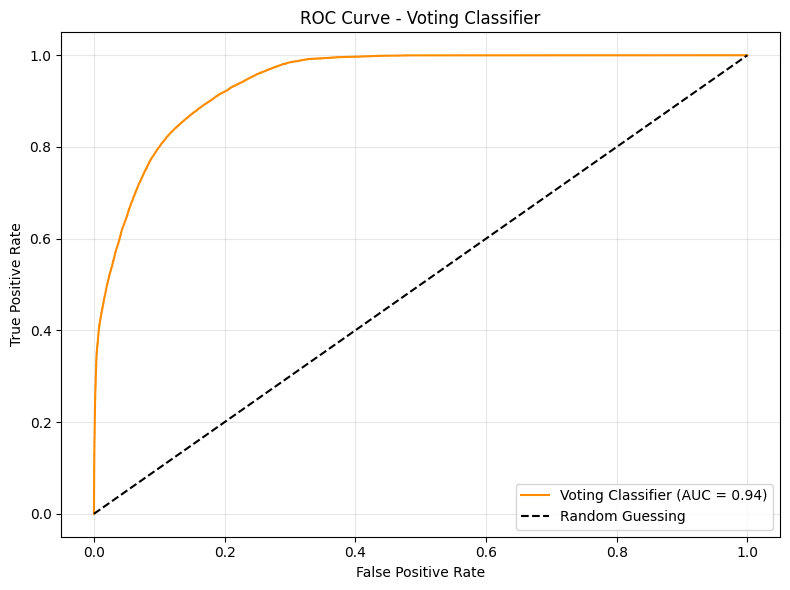

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_score = ensemble.predict_proba(X_test)

# Plot ROC curve for the ensemble model
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Voting Classifier (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipython-input-14-1945281807.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=class_accuracies, palette='viridis')


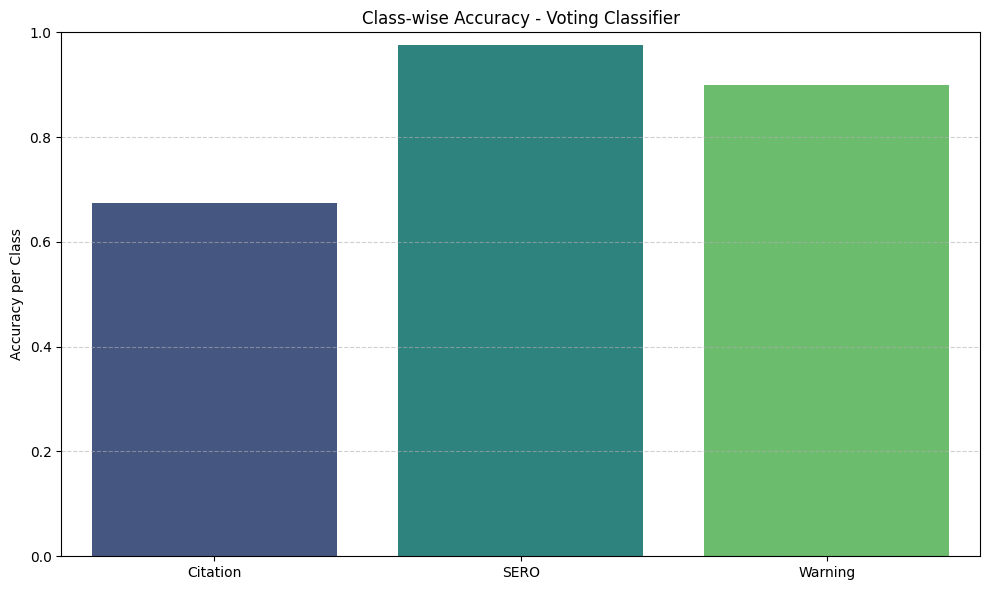

In [ ]:
from sklearn.metrics import accuracy_score

# Get individual class accuracy
correct = (y_test == y_pred)
class_accuracies = []
for i, cls in enumerate(np.unique(y_test)):
    class_mask = (y_test == cls)
    acc = accuracy_score(y_test[class_mask], y_pred[class_mask])
    class_accuracies.append(acc)

plt.figure(figsize=(10, 6))
sns.barplot(x=label_encoder.classes_, y=class_accuracies, palette='viridis')
plt.ylabel("Accuracy per Class")
plt.title("Class-wise Accuracy - Voting Classifier")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
!pip install pytorch-tabular
!pip install pytorch-lightning


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successful

In [ ]:
from pytorch_tabular.models import TabTransformerConfig
from pytorch_tabular.tabular_datamodule import TabularDatamodule
from pytorch_tabular.tabular_model import TabularModel
from sklearn.preprocessing import LabelEncoder

import pandas as pd

# Load data
data = pd.read_csv('/content/drive/MyDrive/Dataset/traffic_violations.csv')
target_col = 'Violation.Type'
X = data.drop(columns=[target_col])
y = data[target_col]

# Combine X and y for pytorch-tabular
data_processed = X.copy()
data_processed[target_col] = y

# Encode target
label_encoder = LabelEncoder()
data_processed[target_col] = label_encoder.fit_transform(data_processed[target_col])

# Split into train/valid
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_processed, test_size=0.4, stratify=data_processed[target_col], random_state=42)

In [ ]:
from pytorch_tabular.config import DataConfig
from pytorch_tabular.models.tab_transformer.config import TabTransformerConfig
from pytorch_tabular.tabular_model import TabularModel

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define data config
data_config = DataConfig(
    target=target_col,
    continuous_cols=numerical_cols,
    categorical_cols=categorical_cols,
)

# Corrected TabTransformerConfig without nested `transformer_config`
model_config = TabTransformerConfig(
    task="classification",
    learning_rate=1e-3,
    metrics=["accuracy"],
    num_attention_heads=4,
    num_layers=2,
    attention_dropout=0.2,
    seed=42
)

# Create and train the model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config
)

tabular_model.fit(train=train, validation=test)


TypeError: TabTransformerConfig.__init__() got an unexpected keyword argument 'num_attention_heads'

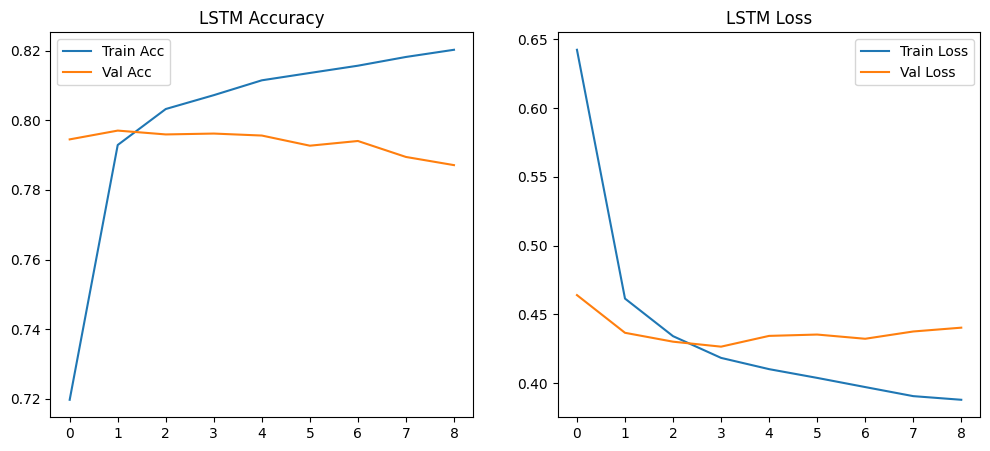

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("LSTM Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("LSTM Loss")
plt.legend()

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Convert sparse matrix to dense
if hasattr(X_train, 'toarray'):
    X_train = X_train.toarray()
    X_test = X_test.toarray()

# One-hot encode the labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Reshape input for LSTM: (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(1, X_train.shape[1])),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# Train the model
history = model.fit(
    X_train_lstm, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_data=(X_test_lstm, y_test_cat),
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, accuracy = model.evaluate(X_test_lstm, y_test_cat, verbose=0)
print(f"Bidirectional LSTM Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6776 - loss: 0.6486 - val_accuracy: 0.7965 - val_loss: 0.4188
Epoch 2/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8051 - loss: 0.4053 - val_accuracy: 0.7945 - val_loss: 0.4183
Epoch 3/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.8114 - loss: 0.3900 - val_accuracy: 0.7966 - val_loss: 0.4162
Epoch 4/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8147 - loss: 0.3766 - val_accuracy: 0.7909 - val_loss: 0.4211
Epoch 5/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8196 - loss: 0.3676 - val_accuracy: 0.7939 - val_loss: 0.4242
Epoch 6/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8272 - loss: 0.3543 - val_accuracy: 0.7930 - val_loss: 0.4329
Epoch 7/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8313 - loss: 0.3458 - val_accuracy: 0.7898 - val_loss: 0.4470
Epoch 8/10
660/660 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8360 - loss: 0.3360 - val

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert sparse matrix to dense
if hasattr(X_train, 'toarray'):
    X_train = X_train.toarray()
    X_test = X_test.toarray()

# Binarize target for multiclass classification
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Reshape input: [samples, timesteps, features]
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM Model
model = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1]), return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_lstm, y_train_cat,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_cat),
    verbose=1
)

# Evaluate
loss, accuracy = model.evaluate(X_test_lstm, y_test_cat, verbose=0)
print(f"LSTM Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7094 - loss: 0.5970 - val_accuracy: 0.7937 - val_loss: 0.4212
Epoch 2/30
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8006 - loss: 0.4015 - val_accuracy: 0.7962 - val_loss: 0.4215
Epoch 3/30
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8102 - loss: 0.3845 - val_accuracy: 0.7970 - val_loss: 0.4161
Epoch 4/30
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8190 - loss: 0.3664 - val_accuracy: 0.7949 - val_loss: 0.4315
Epoch 5/30
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8308 - loss: 0.3517 - val_accuracy: 0.7915 - val_loss: 0.4348
Epoch 6/30
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8352 - loss: 0.3390 - val_accuracy: 0.7925 - val_loss: 0.4385
Epoch 7/30
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8433 - loss: 0.3278 - val_accuracy: 0.7866 - val_loss: 0.4570
Epoch 8/30
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8530 - 

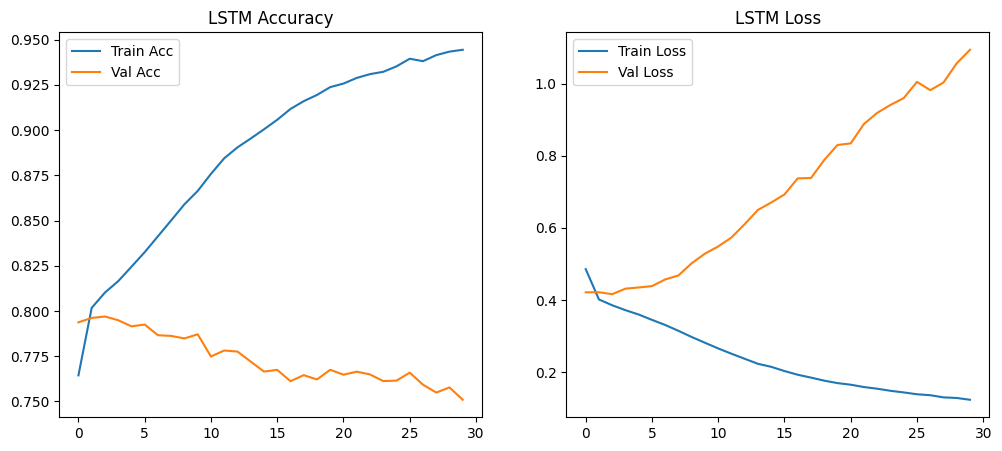

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("LSTM Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("LSTM Loss")
plt.legend()

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75     12981
           1       1.00      0.97      0.98      1402
           2       0.74      0.87      0.80     13753

    accuracy                           0.79     28136
   macro avg       0.86      0.84      0.84     28136
weighted avg       0.80      0.79      0.79     28136

Confusion Matrix:
 [[ 8868     0  4113]
 [   10  1356    36]
 [ 1811     0 11942]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/traffic_violations.csv')

In [ ]:
print("Dataset Info:")
data.info()
print("\nSample Data:")
print(data.head())
print("\nMissing Values:\n", data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70340 entries, 0 to 70339
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Description              70340 non-null  object 
 1   Belts                    70340 non-null  object 
 2   Personal.Injury          70340 non-null  object 
 3   Property.Damage          70340 non-null  object 
 4   Commercial.License       70340 non-null  object 
 5   Commercial.Vehicle       70340 non-null  object 
 6   State                    70337 non-null  object 
 7   VehicleType              70340 non-null  object 
 8   Year                     69906 non-null  float64
 9   Make                     69892 non-null  object 
 10  Model                    69885 non-null  object 
 11  Color                    69452 non-null  object 
 12  Charge                   70340 non-null  object 
 13  Contributed.To.Accident  70340 non-null  object 
 14  Race    

In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

In [ ]:
X = data.drop('Violation.Type', axis=1)
y = data['Violation.Type']

In [ ]:
le = LabelEncoder()
for col in categorical_cols:
    if col != 'Violation.Type':
        X[col] = le.fit_transform(X[col])

In [ ]:
if y.dtype == 'object':
    y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

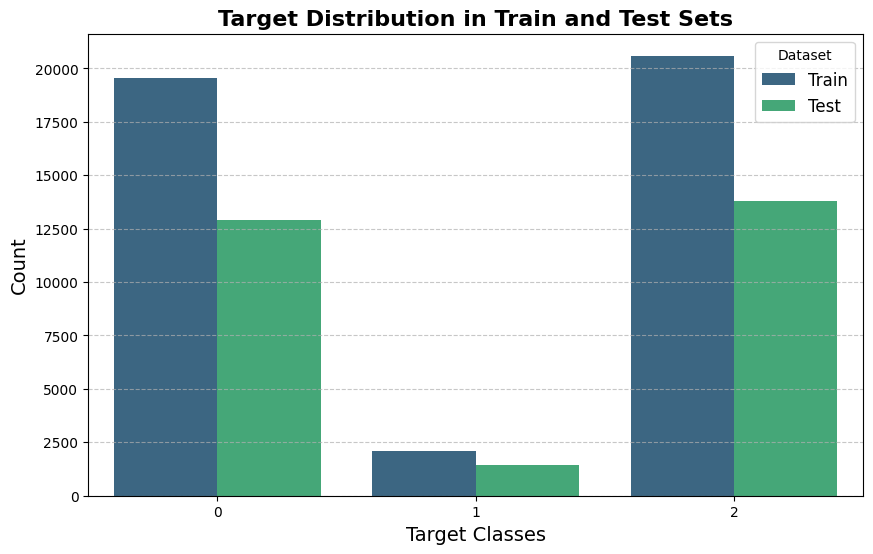

In [ ]:
train_data = pd.DataFrame({'Dataset': 'Train', 'Target': y_train})
test_data = pd.DataFrame({'Dataset': 'Test', 'Target': y_test})
combined_data = pd.concat([train_data, test_data])
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='Target', hue='Dataset', palette='viridis')
plt.title("Target Distribution in Train and Test Sets", fontsize=16, fontweight='bold')
plt.xlabel("Target Classes", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Dataset", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

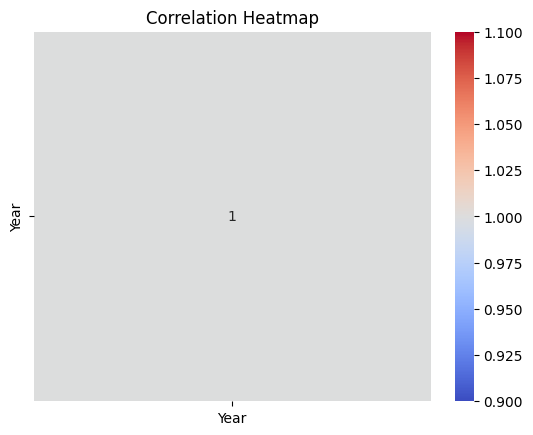

In [ ]:
correlation_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75     12918
           1       1.00      1.00      1.00      1432
           2       0.75      0.85      0.80     13786

    accuracy                           0.79     28136
   macro avg       0.85      0.85      0.85     28136
weighted avg       0.79      0.79      0.78     28136

Confusion Matrix:
 [[ 8996     3  3919]
 [    0  1432     0]
 [ 2102     1 11683]]


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test)
print("\nDecisionTree Evaluation:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


DecisionTree Evaluation:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71     12918
           1       1.00      1.00      1.00      1432
           2       0.72      0.72      0.72     13786

    accuracy                           0.73     28136
   macro avg       0.81      0.81      0.81     28136
weighted avg       0.73      0.73      0.73     28136

Confusion Matrix:
 [[9117    1 3800]
 [   0 1432    0]
 [3821    0 9965]]


In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gb = gb.predict(X_test)
print("\nGradientBoosting Evaluation:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


GradientBoosting Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.67      0.75     12918
           1       1.00      1.00      1.00      1432
           2       0.74      0.89      0.81     13786

    accuracy                           0.79     28136
   macro avg       0.86      0.85      0.85     28136
weighted avg       0.81      0.79      0.79     28136

Confusion Matrix:
 [[ 8601     1  4316]
 [    0  1432     0]
 [ 1485     0 12301]]


In [ ]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)
print("\nXGBClassifier Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBClassifier Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.69      0.76     12918
           1       1.00      1.00      1.00      1432
           2       0.75      0.88      0.81     13786

    accuracy                           0.80     28136
   macro avg       0.86      0.86      0.86     28136
weighted avg       0.80      0.80      0.80     28136

Confusion Matrix:
 [[ 8933     3  3982]
 [    0  1431     1]
 [ 1702     2 12082]]


In [ ]:
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_dt = dt.predict_proba(X_test)[:, 1]
y_prob_gb = gb.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=1)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt, pos_label=1)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb, pos_label=1)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb, pos_label=1)

In [ ]:
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovr')
auc_gb = roc_auc_score(y_test, gb.predict_proba(X_test), multi_class='ovr')
auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr')

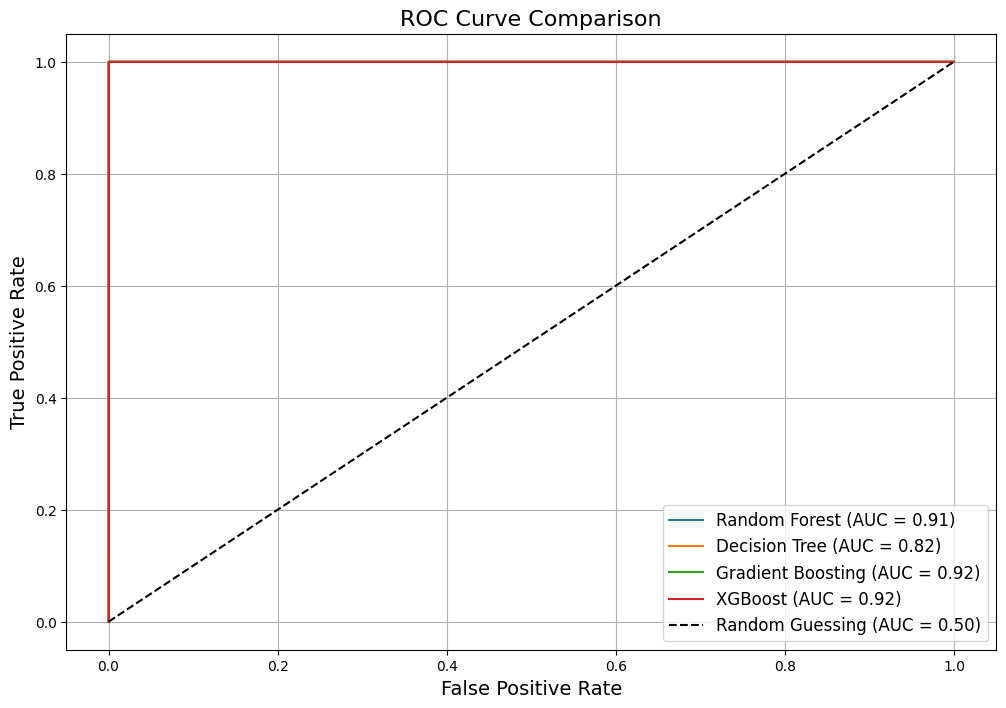

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')

plt.title('ROC Curve Comparison', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()


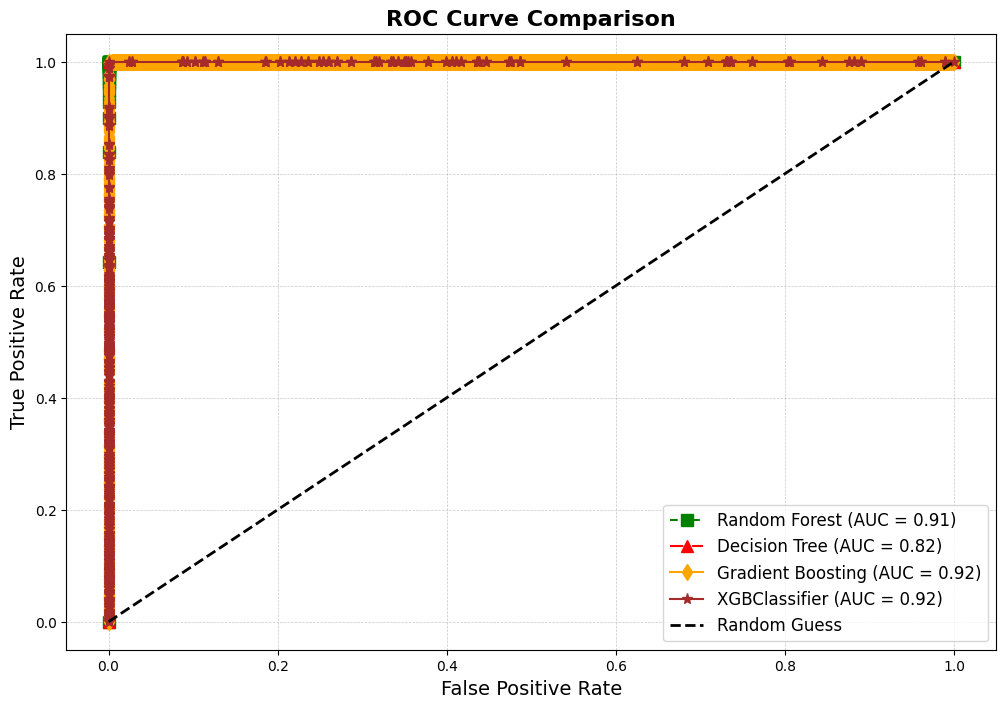

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))



plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='green', linestyle='--', marker='s', markersize=8)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})", color='red', linestyle='-.', marker='^', markersize=8)
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc_gb:.2f})", color='orange', linestyle='-', marker='d', markersize=8)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBClassifier (AUC = {auc_xgb:.2f})", color='brown', linestyle='-', marker='*', markersize=8)


plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", linewidth=2)

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve Comparison", fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)


plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

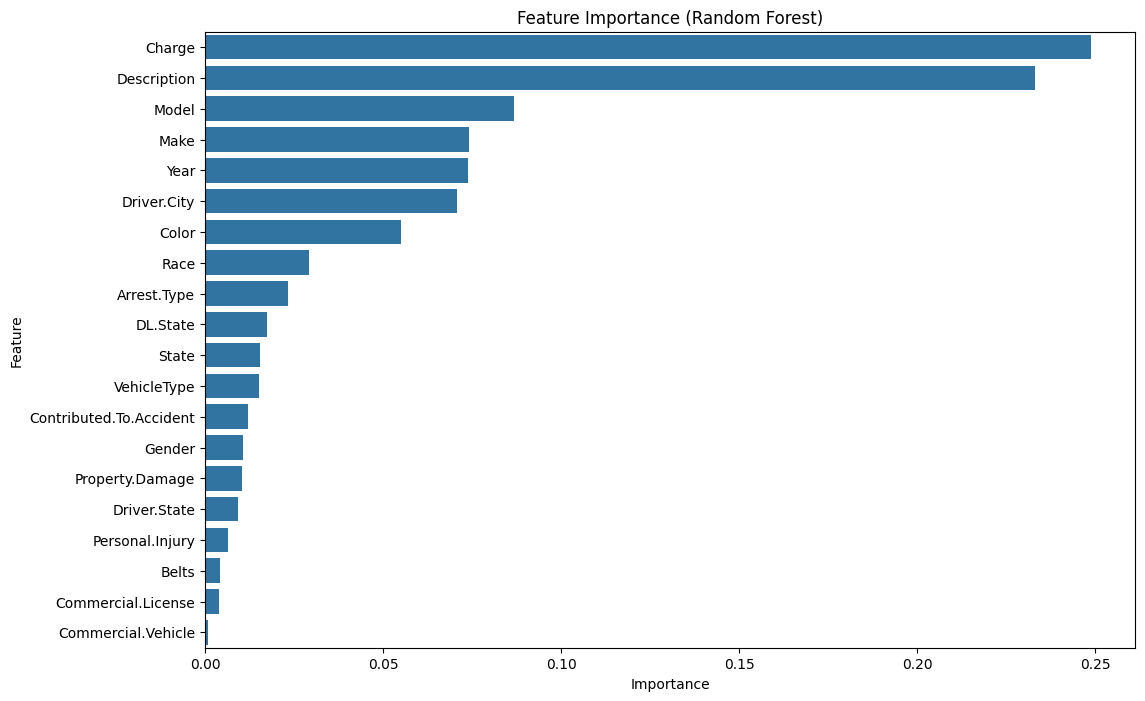

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return ' '.join([word for word in text.split() if word not in stop_words])

data['clean_desc'] = data['Description'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['clean_desc'])

sequences = tokenizer.texts_to_sequences(data['clean_desc'])
padded_sequences = pad_sequences(sequences, maxlen=50)

# Replace X with LSTM input
X_lstm = padded_sequences
y_lstm = y  # already encoded


In [ ]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=42
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
import numpy as np

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_shape=(50,)),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_lstm)), activation='softmax')  # for multiclass
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()  # Now it will display correct parameter counts and shapes

model.fit(X_train_lstm, y_train_lstm, epochs=15, batch_size=32, validation_split=0.1)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,387,267 (5.29 MB)

 Trainable params: 1,387,267 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7353 - loss: 0.5198 - val_accuracy: 0.7795 - val_loss: 0.4320
Epoch 2/15
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7824 - loss: 0.4252 - val_accuracy: 0.7786 - val_loss: 0.4342
Epoch 3/15
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7910 - loss: 0.4185 - val_accuracy: 0.7775 - val_loss: 0.4329
Epoch 4/15
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7876 - loss: 0.4188 - val_accuracy: 0.7786 - val_loss: 0.4329
Epoch 5/15
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7871 - loss: 0.4199 - val_accuracy: 0.7806 - val_loss: 0.4299
Epoch 6/15
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7890 - loss: 0.4163 - val_accuracy: 0.7736 - val_loss: 0.4319
Epoch 7/15
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7870 - loss: 0.4184 - val_accuracy: 0.7779 - val_loss: 0.4367
Epoch 8/15
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7948 -

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-06-25 17:10:46--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-25 17:10:46--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-25 17:10:47--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd # Import pandas

# Load the data
try:
    data = pd.read_csv('/content/drive/MyDrive/Dataset/traffic_violations.csv')
except FileNotFoundError:
    print("Error: traffic_violations.csv not found. Please check the file path.")
    # Exit or handle the error appropriately if the file is not found
    exit()


stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return ' '.join([word for word in text.split() if word not in stop_words])

# Clean the 'Description' column
data['clean_desc'] = data['Description'].apply(clean_text)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['clean_desc'])

embedding_index = {}
# Assuming 'glove.6B.100d.txt' is available from previous steps (cell ewW7hp-REf4O and 1tCoSPcjFYL_)
# If not, you need to download and unzip the glove file first.
# For demonstration, reading the glove file
try:
    with open('glove.6B.100d.txt', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = coefs
except FileNotFoundError:
    print("Error: glove.6B.100d.txt not found. Please run the cells to download and unzip the glove file.")


embedding_matrix = np.zeros((10000, 100))
for word, i in tokenizer.word_index.items():
    if i < 10000 and word in embedding_index:
        embedding_matrix[i] = embedding_index[word]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(input_dim=10000,
                            output_dim=100,
                            weights=[embedding_matrix],
                            input_length=50,
                            trainable=False)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Use GloVe embedding layer
embedding_layer = Embedding(
    input_dim=10000,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=50,
    trainable=False  # keep it False to use static GloVe embeddings
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Assuming 'tokenizer' and 'data' with 'clean_desc' column are available from previous cells
# If not, you need to run those cells first or include their code here.

sequences = tokenizer.texts_to_sequences(data['clean_desc'])
padded_sequences = pad_sequences(sequences, maxlen=50)

# Assuming 'y' is available and encoded from previous cells
# If not, you need to define and encode 'y' first.
# For demonstration, assuming 'y_lstm' is already defined and encoded
X = data.drop('Violation.Type', axis=1)
y = data['Violation.Type']

le = LabelEncoder()
if y.dtype == 'object':
    y = le.fit_transform(y)

y_lstm = y

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    padded_sequences, y_lstm, test_size=0.2, random_state=42
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data
try:
    data = pd.read_csv('/content/drive/MyDrive/Dataset/traffic_violations.csv')
except FileNotFoundError:
    print("Error: traffic_violations.csv not found. Please check the file path.")
    exit()

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return ' '.join([word for word in text.split() if word not in stop_words])

data['clean_desc'] = data['Description'].apply(clean_text)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['clean_desc'])

embedding_index = {}
try:
    with open('glove.6B.100d.txt', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = coefs
except FileNotFoundError:
    print("Error: glove.6B.100d.txt not found. Please run the cells to download and unzip the glove file.")

embedding_matrix = np.zeros((10000, 100))
for word, i in tokenizer.word_index.items():
    if i < 10000 and word in embedding_index:
        embedding_matrix[i] = embedding_index[word]

# Use GloVe embedding layer
embedding_layer = Embedding(
    input_dim=10000,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=50,
    trainable=False  # keep it False to use static GloVe embeddings
)

X = data.drop('Violation.Type', axis=1)
y = data['Violation.Type']

le = LabelEncoder()
if y.dtype == 'object':
    y = le.fit_transform(y)

y_lstm = y

sequences = tokenizer.texts_to_sequences(data['clean_desc'])
padded_sequences = pad_sequences(sequences, maxlen=50)

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    padded_sequences, y_lstm, test_size=0.2, random_state=42
)

model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_train_lstm)), activation='softmax')
])

model.build(input_shape=(None, 50))  # <-- explicitly define input shape
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 50, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 256)            │       234,496 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,251,139 (4.77 MB)

 Trainable params: 251,139 (981.01 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data
try:
    data = pd.read_csv('/content/drive/MyDrive/Dataset/traffic_violations.csv')
except FileNotFoundError:
    print("Error: traffic_violations.csv not found. Please check the file path.")
    exit()

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return ' '.join([word for word in text.split() if word not in stop_words])

data['clean_desc'] = data['Description'].apply(clean_text)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['clean_desc'])

embedding_index = {}
try:
    with open('glove.6B.100d.txt', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = coefs
except FileNotFoundError:
    print("Error: glove.6B.100d.txt not found. Please run the cells to download and unzip the glove file.")

embedding_matrix = np.zeros((10000, 100))
for word, i in tokenizer.word_index.items():
    if i < 10000 and word in embedding_index:
        embedding_matrix[i] = embedding_index[word]

# Use GloVe embedding layer
embedding_layer = Embedding(
    input_dim=10000,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=50,
    trainable=False  # keep it False to use static GloVe embeddings
)

X = data.drop('Violation.Type', axis=1)
y = data['Violation.Type']

le = LabelEncoder()
if y.dtype == 'object':
    y = le.fit_transform(y)

y_lstm = y

sequences = tokenizer.texts_to_sequences(data['clean_desc'])
padded_sequences = pad_sequences(sequences, maxlen=50)

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    padded_sequences, y_lstm, test_size=0.2, random_state=42
)

model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_train_lstm)), activation='softmax')
])

model.compile(optimizer=Adam(0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    X_train_lstm,
    y_train_lstm,
    epochs=20,  # Increased from 15
    batch_size=32,
    validation_split=0.1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.7236 - loss: 0.5421 - val_accuracy: 0.7745 - val_loss: 0.4421
Epoch 2/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.7788 - loss: 0.4400 - val_accuracy: 0.7743 - val_loss: 0.4408
Epoch 3/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7807 - loss: 0.4343 - val_accuracy: 0.7743 - val_loss: 0.4399
Epoch 4/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7838 - loss: 0.4315 - val_accuracy: 0.7781 - val_loss: 0.4345
Epoch 5/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7863 - loss: 0.4239 - val_accuracy: 0.7783 - val_loss: 0.4318
Epoch 6/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7856 - loss: 0.4225 - val_accuracy: 0.7811 - val_loss: 0.4315
Epoch 7/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7882 - loss: 0.4220 - val_accuracy: 0.7788 - val_loss: 0.4330
Epoch 8/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7857 -